In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score,accuracy_score
from itertools import permutations

In [25]:
dataset = load_iris()
df = pd.DataFrame(np.concatenate([dataset.data, dataset.target.reshape(150,1)], axis=1), columns=[*dataset.feature_names, 'Class'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


In [27]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [28]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [29]:
df.groupby('Class').size()

Class
0.0    50
1.0    50
2.0    50
dtype: int64

In [30]:
def calculate_accuracy(labels, target):
    accuracies = []
    for perm in permutations([0, 1, 2]):
        mapped_labels = [perm[label] for label in labels]
        accuracy = accuracy_score(mapped_labels, target)
        accuracies.append(accuracy)
    return max(accuracies)

# Define the Euclidean distance function
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

# Function to calculate cluster centroids
def calculate_centroids(data, labels, k):
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[labels == i]
        centroids[i] = np.mean(cluster_points, axis=0)
    return centroids

# Evaluation function
def evaluate_clusters(data, centroids, labels):
    total_distance = 0
    for i in range(len(data)):
        total_distance += euclidean_distance(data[i], centroids[labels[i]])
    return total_distance


In [31]:

# Genetic Algorithm
def genetic_algorithm(data, k, population_size, generations, mutation_rate):
    population = np.random.randint(0, k, size=(population_size, data.shape[0]))

    for generation in range(generations):
        fitness_scores = []
        for i in range(population_size):
            centroids = calculate_centroids(data, population[i], k)
            fitness = evaluate_clusters(data, centroids, population[i])
            fitness_scores.append(fitness)
        # Parent selection based on fitness probability
        parents_indices = np.random.choice(population_size, size=2, p=(1 / np.array(fitness_scores)) / sum(1 / np.array(fitness_scores)))

        # Create children using crossover
        crossover_point = np.random.randint(1, data.shape[0] - 1)
        child1 = np.concatenate((population[parents_indices[0]][:crossover_point], population[parents_indices[1]][crossover_point:]))
        child2 = np.concatenate((population[parents_indices[1]][:crossover_point], population[parents_indices[0]][crossover_point:]))

        # Perform mutation
        if np.random.rand() > mutation_rate:
            mutation_point = np.random.randint(data.shape[0])
            mutation_label = np.random.randint(k)
            child1[mutation_point] = mutation_label
        if np.random.rand() > mutation_rate:
            mutation_point = np.random.randint(data.shape[0])
            mutation_label = np.random.randint(k)
            child2[mutation_point] = mutation_label

        # Replace the old generation with the children
        min_index1 = np.argmin(fitness_scores)
        min_index2 = np.argmax(fitness_scores)
        population[min_index1] = child1
        population[min_index2] = child2

    # Select the best chromosome as the output
    best_index = np.argmin(fitness_scores)
    best_chromosome = population[best_index]
    return best_chromosome

In [32]:
iris = load_iris()
target=iris.target
data = iris.data

In [39]:
A=[]
S=[]
k = 3  # number of clusters
population_size = 10
generations = 1000
for _ in range(10):
    best_chromosome = genetic_algorithm(data, k, population_size, generations, 0.3)
    best_centroids = calculate_centroids(data, best_chromosome, k)
    best_labels = pairwise_distances_argmin_min(data, best_centroids)[0]

    print("Best Chromosome:", best_chromosome)
    print("Best Labels:", best_labels)
    accuracy = calculate_accuracy(best_labels, target)
    print('accuracy', accuracy)
    
    # Calculate silhouette coefficient
    silhouette_coefficient = silhouette_score(data, best_labels)
    A.append(accuracy)
    S.append(silhouette_coefficient)
    print("Silhouette Coefficient:", silhouette_coefficient)


Best Chromosome: [1 1 1 1 0 0 1 2 0 0 1 1 0 2 0 0 1 0 1 0 1 1 0 1 1 2 2 2 2 2 1 0 2 0 2 0 1
 2 1 0 0 0 0 1 0 2 2 2 0 0 2 2 0 2 1 1 1 0 2 1 1 2 1 0 2 1 0 0 1 0 2 1 0 2
 1 0 0 2 0 1 0 1 1 2 0 1 0 1 1 2 1 0 1 0 1 0 0 0 0 0 2 2 1 1 0 2 2 1 1 1 1
 1 1 1 0 2 0 2 2 0 2 2 2 0 2 0 2 1 1 2 2 0 0 0 1 1 1 0 1 0 0 1 1 1 2 1 2 0
 0 0]
Best Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 0 2 1 0 2 1 2 0 2 2 1 2 1 2 2 2 2
 2 2 2 2 2 0 1 1 1 2 2 2 2 2 2 1 2 2 1 0 2 2 2 2 0 2 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy 0.7266666666666667
Silhouette Coefficient: 0.3672237154579163
Best Chromosome: [0 2 2 1 0 2 2 2 2 2 0 0 2 2 0 1 0 2 2 2 1 1 1 1 1 2 1 1 1 2 0 0 2 2 1 1 2
 2 1 2 2 0 2 1 2 0 1 0 2 0 1 0 2 2 1 0 1 0 2 2 1 2 0 1 2 0 2 1 2 1 1 0 0 2
 1 1 2 0 1 0 1 2 2 2 0 0 1 2 0 0 1 2 2 1 2 0 1 0 1 1 2 0 2 2 2 1 0 2 0 0 0
 1 0 2 2 1 1 2 0 1 1 0 2 0 1 1 1 1 2 2 1 2 0 

Average Accuracy: 0.716
Average Silhouette Coefficient: 0.3726570485613826
std Accuracy: 0.027840817357094802
std Silhouette Coefficient: 0.09468550458250968


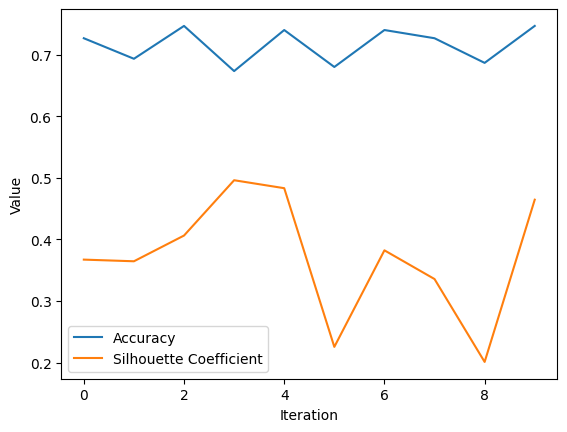

In [41]:
print("Average Accuracy:", np.mean(A))
print("Average Silhouette Coefficient:", np.mean(S))
print("std Accuracy:", np.std(A))
print("std Silhouette Coefficient:", np.std(S))
import matplotlib.pyplot as plt

plt.plot(A, label='Accuracy')
plt.plot(S, label='Silhouette Coefficient')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.show()
